In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import v2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# os.chdir('')
from TrainTestLoops import train_with_wandb
from utils import train_val_test_split, save_results, set_random_seed
from ReceptiveResNets import resnet34, resnet50
# os.chdir('')

In [4]:
set_random_seed(0)
labels = pd.read_csv("labels.csv")

kTrainSize = 100000
kTestSize = 10000
kValSize = 5000
kBatchSize = 128

train_transform = v2.Compose(
        [v2.RandomHorizontalFlip(p=0.3),
        v2.RandomVerticalFlip(p=0.3),
        v2.RandomApply(torch.nn.ModuleList([v2.GaussianBlur(3),]), p=0.2),
        v2.RandomApply(torch.nn.ModuleList([v2.RandomRotation((-15, 15)),]), p=0.2),
        v2.RandomApply(torch.nn.ModuleList([v2.ColorJitter(brightness=[0, 1], contrast=[0, 0.5]),]), p=0.2),
        v2.ToTensor(),
        v2.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
val_test_transform = v2.Compose(
        [v2.ToTensor(),
        v2.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])


train_transform = v2.Compose(
        [v2.RandomHorizontalFlip(),
        v2.RandomVerticalFlip(),
        v2.GaussianBlur(3),
        v2.RandomRotation((-15, 15)),
        v2.ToTensor(),
        v2.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
val_test_transform = v2.Compose(
        [v2.ToTensor(),
        v2.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

train_transform = v2.Compose(
        [v2.AugMix(),
        v2.ToTensor(),
        v2.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
val_test_transform = v2.Compose(
        [v2.ToTensor(),
        v2.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_loader, val_loader, test_loader = train_val_test_split(kTrainSize, kValSize, kTestSize,
                                                                train_transform, val_test_transform, kBatchSize, labels)

/home/boris/.local/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:43: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [ ]:
# upper cell first!!!
n_epochs = 60
n_classes = 200
model = resnet50().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.5, momentum=0.9, nesterov=True)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs)
train_with_wandb(model, optimizer, n_epochs, train_loader, val_loader, model_name='MYresnet50',  scheduler=scheduler)

In [ ]:
save_results(model, test_loader, kTestSize, filename='test_labels')

In [10]:
n_epochs = 30
n_classes = 200
model = resnet50()
optimizer = optim.SGD(model.parameters(), lr=0.5, momentum=0.9)

In [11]:
arr = []
for i in range(4, 60, 5):
    optimizer.load_state_dict(torch.load(f'epoch_{i}optimizer_MYresnet50.pt', map_location=torch.device('cpu')))
    arr.append(optimizer.param_groups[0]['lr'])

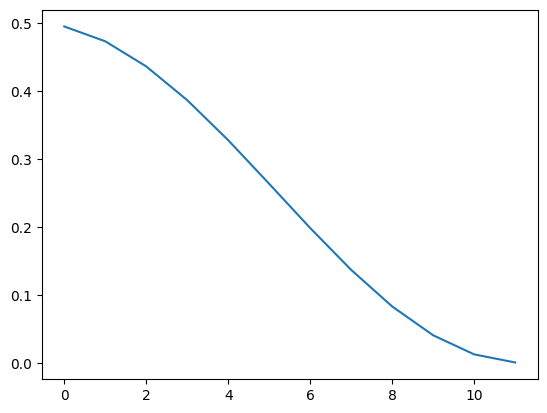

In [12]:
plt.plot(arr)